In [9]:
import torch
from torch.autograd import Variable
from sklearn.datasets import load_iris
from keras.utils import to_categorical
import numpy as np

#batch size
batch_size=10

#loading iris data from sklearn
iris = load_iris()

x_data=iris.data
y_data=iris.target

#one hot encoding
y_data = to_categorical(y_data)

#numpy to pytorch variable
x_data = Variable(torch.from_numpy(x_data).double())
y_data = Variable(torch.from_numpy(y_data).double())


In [10]:

class Model(torch.nn.Module):

    def __init__(self):
        super(Model,self).__init__()
        self.l1 = torch.nn.Linear(4, 8)
        self.l2 = torch.nn.Linear(8, 3)
        self.l3 = torch.nn.Linear(3, 3)
#        self.sigmoid=torch.nn.Sigmoid()
        self.relu=torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(p=0.5, inplace=False)
        self.softmax = torch.nn.Softmax()
        
    def forward(self,x):
        out1 = self.l1(x)
#        drop1 = self.dropout(out1)
        out2 = self.relu(self.l2(out1))
#        drop2 = self.dropout(out2)
        y_pred = self.softmax(self.l3(out2))
        return y_pred
        

net = Model().double()

#model summary
print(net)

#binary cross entropy loss
#loss_fun = torch.nn.BCELoss(size_average=True)
loss_fun = torch.nn.CrossEntropyLoss()

#SGD optimizer
import torch.optim as optim

criterion = torch.nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

permutation = torch.randperm(x_data.size()[0])


Model(
  (l1): Linear(in_features=4, out_features=8, bias=True)
  (l2): Linear(in_features=8, out_features=3, bias=True)
  (l3): Linear(in_features=3, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (softmax): Softmax(dim=None)
)


In [11]:
#training
learning = list()
partial = list()
for epoch in range(1000):
    print("Epoch: "+str(epoch))
    partial = list()
    for i in range(0, x_data.size()[0], batch_size):
        indices = permutation[i:i+batch_size]
        inputs, inputs_y = x_data[indices], y_data[indices]
        
        optimizer.zero_grad()
        outputs = net(inputs)
        
        loss = criterion(outputs, inputs_y)
        partial.append(loss.data)
        print(epoch, loss.data)        
        loss.backward()
        optimizer.step()
        
    learning.append(np.mean(partial))

Epoch: 0
0 tensor(0.2354, dtype=torch.float64)
0 tensor(0.2235, dtype=torch.float64)
0 tensor(0.2398, dtype=torch.float64)
0 tensor(0.2239, dtype=torch.float64)
0 tensor(0.2220, dtype=torch.float64)
0 tensor(0.2324, dtype=torch.float64)
0 tensor(0.2255, dtype=torch.float64)
0 tensor(0.2256, dtype=torch.float64)
0 tensor(0.2364, dtype=torch.float64)
0 tensor(0.2254, dtype=torch.float64)
0 tensor(0.2256, dtype=torch.float64)
0 tensor(0.2366, dtype=torch.float64)
0 tensor(0.2288, dtype=torch.float64)
0 tensor(0.2305, dtype=torch.float64)
0 tensor(0.2268, dtype=torch.float64)
Epoch: 1
1 tensor(0.2330, dtype=torch.float64)
1 tensor(0.2244, dtype=torch.float64)
1 tensor(0.2362, dtype=torch.float64)
1 tensor(0.2237, dtype=torch.float64)
1 tensor(0.2217, dtype=torch.float64)
1 tensor(0.2307, dtype=torch.float64)
1 tensor(0.2256, dtype=torch.float64)
1 tensor(0.2259, dtype=torch.float64)
1 tensor(0.2337, dtype=torch.float64)
1 tensor(0.2254, dtype=torch.float64)
1 tensor(0.2257, dtype=torch.flo

/Users/raul.reguillo/.pyenv/versions/3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


11 tensor(0.2210, dtype=torch.float64)
Epoch: 12
12 tensor(0.2172, dtype=torch.float64)
12 tensor(0.2311, dtype=torch.float64)
12 tensor(0.2121, dtype=torch.float64)
12 tensor(0.2237, dtype=torch.float64)
12 tensor(0.2210, dtype=torch.float64)
12 tensor(0.2202, dtype=torch.float64)
12 tensor(0.2272, dtype=torch.float64)
12 tensor(0.2289, dtype=torch.float64)
12 tensor(0.2153, dtype=torch.float64)
12 tensor(0.2263, dtype=torch.float64)
12 tensor(0.2270, dtype=torch.float64)
12 tensor(0.2096, dtype=torch.float64)
12 tensor(0.2256, dtype=torch.float64)
12 tensor(0.2078, dtype=torch.float64)
12 tensor(0.2206, dtype=torch.float64)
Epoch: 13
13 tensor(0.2164, dtype=torch.float64)
13 tensor(0.2314, dtype=torch.float64)
13 tensor(0.2107, dtype=torch.float64)
13 tensor(0.2236, dtype=torch.float64)
13 tensor(0.2209, dtype=torch.float64)
13 tensor(0.2196, dtype=torch.float64)
13 tensor(0.2272, dtype=torch.float64)
13 tensor(0.2291, dtype=torch.float64)
13 tensor(0.2143, dtype=torch.float64)
13 te

28 tensor(0.2264, dtype=torch.float64)
28 tensor(0.2293, dtype=torch.float64)
28 tensor(0.2037, dtype=torch.float64)
28 tensor(0.2251, dtype=torch.float64)
28 tensor(0.2260, dtype=torch.float64)
28 tensor(0.1955, dtype=torch.float64)
28 tensor(0.2226, dtype=torch.float64)
28 tensor(0.1955, dtype=torch.float64)
28 tensor(0.2162, dtype=torch.float64)
Epoch: 29
29 tensor(0.2071, dtype=torch.float64)
29 tensor(0.2325, dtype=torch.float64)
29 tensor(0.1968, dtype=torch.float64)
29 tensor(0.2223, dtype=torch.float64)
29 tensor(0.2194, dtype=torch.float64)
29 tensor(0.2123, dtype=torch.float64)
29 tensor(0.2262, dtype=torch.float64)
29 tensor(0.2291, dtype=torch.float64)
29 tensor(0.2032, dtype=torch.float64)
29 tensor(0.2249, dtype=torch.float64)
29 tensor(0.2258, dtype=torch.float64)
29 tensor(0.1949, dtype=torch.float64)
29 tensor(0.2222, dtype=torch.float64)
29 tensor(0.1950, dtype=torch.float64)
29 tensor(0.2160, dtype=torch.float64)
Epoch: 30
30 tensor(0.2066, dtype=torch.float64)
30 te

42 tensor(0.1970, dtype=torch.float64)
42 tensor(0.2208, dtype=torch.float64)
42 tensor(0.2216, dtype=torch.float64)
42 tensor(0.1884, dtype=torch.float64)
42 tensor(0.2171, dtype=torch.float64)
42 tensor(0.1895, dtype=torch.float64)
42 tensor(0.2121, dtype=torch.float64)
Epoch: 43
43 tensor(0.2008, dtype=torch.float64)
43 tensor(0.2285, dtype=torch.float64)
43 tensor(0.1896, dtype=torch.float64)
43 tensor(0.2188, dtype=torch.float64)
43 tensor(0.2160, dtype=torch.float64)
43 tensor(0.2062, dtype=torch.float64)
43 tensor(0.2217, dtype=torch.float64)
43 tensor(0.2247, dtype=torch.float64)
43 tensor(0.1966, dtype=torch.float64)
43 tensor(0.2204, dtype=torch.float64)
43 tensor(0.2212, dtype=torch.float64)
43 tensor(0.1880, dtype=torch.float64)
43 tensor(0.2166, dtype=torch.float64)
43 tensor(0.1891, dtype=torch.float64)
43 tensor(0.2117, dtype=torch.float64)
Epoch: 44
44 tensor(0.2003, dtype=torch.float64)
44 tensor(0.2281, dtype=torch.float64)
44 tensor(0.1891, dtype=torch.float64)
44 te

66 tensor(0.1792, dtype=torch.float64)
66 tensor(0.2016, dtype=torch.float64)
Epoch: 67
67 tensor(0.1858, dtype=torch.float64)
67 tensor(0.2141, dtype=torch.float64)
67 tensor(0.1762, dtype=torch.float64)
67 tensor(0.2089, dtype=torch.float64)
67 tensor(0.2067, dtype=torch.float64)
67 tensor(0.1903, dtype=torch.float64)
67 tensor(0.2068, dtype=torch.float64)
67 tensor(0.2086, dtype=torch.float64)
67 tensor(0.1835, dtype=torch.float64)
67 tensor(0.2059, dtype=torch.float64)
67 tensor(0.2060, dtype=torch.float64)
67 tensor(0.1756, dtype=torch.float64)
67 tensor(0.1996, dtype=torch.float64)
67 tensor(0.1787, dtype=torch.float64)
67 tensor(0.2010, dtype=torch.float64)
Epoch: 68
68 tensor(0.1850, dtype=torch.float64)
68 tensor(0.2132, dtype=torch.float64)
68 tensor(0.1755, dtype=torch.float64)
68 tensor(0.2083, dtype=torch.float64)
68 tensor(0.2062, dtype=torch.float64)
68 tensor(0.1894, dtype=torch.float64)
68 tensor(0.2059, dtype=torch.float64)
68 tensor(0.2077, dtype=torch.float64)
68 te

81 tensor(0.1918, dtype=torch.float64)
81 tensor(0.1731, dtype=torch.float64)
81 tensor(0.1917, dtype=torch.float64)
81 tensor(0.1908, dtype=torch.float64)
81 tensor(0.1662, dtype=torch.float64)
81 tensor(0.1830, dtype=torch.float64)
81 tensor(0.1709, dtype=torch.float64)
81 tensor(0.1912, dtype=torch.float64)
Epoch: 82
82 tensor(0.1709, dtype=torch.float64)
82 tensor(0.1982, dtype=torch.float64)
82 tensor(0.1647, dtype=torch.float64)
82 tensor(0.1982, dtype=torch.float64)
82 tensor(0.1972, dtype=torch.float64)
82 tensor(0.1743, dtype=torch.float64)
82 tensor(0.1905, dtype=torch.float64)
82 tensor(0.1904, dtype=torch.float64)
82 tensor(0.1721, dtype=torch.float64)
82 tensor(0.1906, dtype=torch.float64)
82 tensor(0.1896, dtype=torch.float64)
82 tensor(0.1653, dtype=torch.float64)
82 tensor(0.1816, dtype=torch.float64)
82 tensor(0.1702, dtype=torch.float64)
82 tensor(0.1905, dtype=torch.float64)
Epoch: 83
83 tensor(0.1695, dtype=torch.float64)
83 tensor(0.1971, dtype=torch.float64)
83 te

Epoch: 98
98 tensor(0.1494, dtype=torch.float64)
98 tensor(0.1853, dtype=torch.float64)
98 tensor(0.1485, dtype=torch.float64)
98 tensor(0.1928, dtype=torch.float64)
98 tensor(0.1936, dtype=torch.float64)
98 tensor(0.1565, dtype=torch.float64)
98 tensor(0.1758, dtype=torch.float64)
98 tensor(0.1744, dtype=torch.float64)
98 tensor(0.1563, dtype=torch.float64)
98 tensor(0.1769, dtype=torch.float64)
98 tensor(0.1754, dtype=torch.float64)
98 tensor(0.1499, dtype=torch.float64)
98 tensor(0.1631, dtype=torch.float64)
98 tensor(0.1589, dtype=torch.float64)
98 tensor(0.1823, dtype=torch.float64)
Epoch: 99
99 tensor(0.1485, dtype=torch.float64)
99 tensor(0.1845, dtype=torch.float64)
99 tensor(0.1479, dtype=torch.float64)
99 tensor(0.1923, dtype=torch.float64)
99 tensor(0.1932, dtype=torch.float64)
99 tensor(0.1556, dtype=torch.float64)
99 tensor(0.1750, dtype=torch.float64)
99 tensor(0.1735, dtype=torch.float64)
99 tensor(0.1556, dtype=torch.float64)
99 tensor(0.1761, dtype=torch.float64)
99 te

111 tensor(0.1536, dtype=torch.float64)
111 tensor(0.1757, dtype=torch.float64)
Epoch: 112
112 tensor(0.1388, dtype=torch.float64)
112 tensor(0.1743, dtype=torch.float64)
112 tensor(0.1408, dtype=torch.float64)
112 tensor(0.1855, dtype=torch.float64)
112 tensor(0.1876, dtype=torch.float64)
112 tensor(0.1460, dtype=torch.float64)
112 tensor(0.1646, dtype=torch.float64)
112 tensor(0.1629, dtype=torch.float64)
112 tensor(0.1484, dtype=torch.float64)
112 tensor(0.1659, dtype=torch.float64)
112 tensor(0.1646, dtype=torch.float64)
112 tensor(0.1430, dtype=torch.float64)
112 tensor(0.1512, dtype=torch.float64)
112 tensor(0.1532, dtype=torch.float64)
112 tensor(0.1752, dtype=torch.float64)
Epoch: 113
113 tensor(0.1381, dtype=torch.float64)
113 tensor(0.1736, dtype=torch.float64)
113 tensor(0.1403, dtype=torch.float64)
113 tensor(0.1850, dtype=torch.float64)
113 tensor(0.1872, dtype=torch.float64)
113 tensor(0.1453, dtype=torch.float64)
113 tensor(0.1638, dtype=torch.float64)
113 tensor(0.1621,

125 tensor(0.1564, dtype=torch.float64)
125 tensor(0.1547, dtype=torch.float64)
125 tensor(0.1380, dtype=torch.float64)
125 tensor(0.1413, dtype=torch.float64)
125 tensor(0.1488, dtype=torch.float64)
125 tensor(0.1688, dtype=torch.float64)
Epoch: 126
126 tensor(0.1305, dtype=torch.float64)
126 tensor(0.1632, dtype=torch.float64)
126 tensor(0.1347, dtype=torch.float64)
126 tensor(0.1778, dtype=torch.float64)
126 tensor(0.1809, dtype=torch.float64)
126 tensor(0.1365, dtype=torch.float64)
126 tensor(0.1537, dtype=torch.float64)
126 tensor(0.1518, dtype=torch.float64)
126 tensor(0.1419, dtype=torch.float64)
126 tensor(0.1557, dtype=torch.float64)
126 tensor(0.1540, dtype=torch.float64)
126 tensor(0.1376, dtype=torch.float64)
126 tensor(0.1405, dtype=torch.float64)
126 tensor(0.1485, dtype=torch.float64)
126 tensor(0.1682, dtype=torch.float64)
Epoch: 127
127 tensor(0.1300, dtype=torch.float64)
127 tensor(0.1624, dtype=torch.float64)
127 tensor(0.1342, dtype=torch.float64)
127 tensor(0.1772,

139 tensor(0.1420, dtype=torch.float64)
139 tensor(0.1362, dtype=torch.float64)
139 tensor(0.1466, dtype=torch.float64)
139 tensor(0.1443, dtype=torch.float64)
139 tensor(0.1327, dtype=torch.float64)
139 tensor(0.1313, dtype=torch.float64)
139 tensor(0.1441, dtype=torch.float64)
139 tensor(0.1617, dtype=torch.float64)
Epoch: 140
140 tensor(0.1229, dtype=torch.float64)
140 tensor(0.1524, dtype=torch.float64)
140 tensor(0.1284, dtype=torch.float64)
140 tensor(0.1694, dtype=torch.float64)
140 tensor(0.1741, dtype=torch.float64)
140 tensor(0.1273, dtype=torch.float64)
140 tensor(0.1428, dtype=torch.float64)
140 tensor(0.1413, dtype=torch.float64)
140 tensor(0.1358, dtype=torch.float64)
140 tensor(0.1459, dtype=torch.float64)
140 tensor(0.1435, dtype=torch.float64)
140 tensor(0.1323, dtype=torch.float64)
140 tensor(0.1306, dtype=torch.float64)
140 tensor(0.1437, dtype=torch.float64)
140 tensor(0.1611, dtype=torch.float64)
Epoch: 141
141 tensor(0.1224, dtype=torch.float64)
141 tensor(0.1516,

153 tensor(0.1321, dtype=torch.float64)
153 tensor(0.1299, dtype=torch.float64)
153 tensor(0.1372, dtype=torch.float64)
153 tensor(0.1339, dtype=torch.float64)
153 tensor(0.1268, dtype=torch.float64)
153 tensor(0.1220, dtype=torch.float64)
153 tensor(0.1385, dtype=torch.float64)
153 tensor(0.1542, dtype=torch.float64)
Epoch: 154
154 tensor(0.1157, dtype=torch.float64)
154 tensor(0.1415, dtype=torch.float64)
154 tensor(0.1214, dtype=torch.float64)
154 tensor(0.1602, dtype=torch.float64)
154 tensor(0.1670, dtype=torch.float64)
154 tensor(0.1181, dtype=torch.float64)
154 tensor(0.1323, dtype=torch.float64)
154 tensor(0.1314, dtype=torch.float64)
154 tensor(0.1294, dtype=torch.float64)
154 tensor(0.1366, dtype=torch.float64)
154 tensor(0.1331, dtype=torch.float64)
154 tensor(0.1264, dtype=torch.float64)
154 tensor(0.1214, dtype=torch.float64)
154 tensor(0.1380, dtype=torch.float64)
154 tensor(0.1536, dtype=torch.float64)
Epoch: 155
155 tensor(0.1152, dtype=torch.float64)
155 tensor(0.1407,

167 tensor(0.1232, dtype=torch.float64)
167 tensor(0.1279, dtype=torch.float64)
167 tensor(0.1233, dtype=torch.float64)
167 tensor(0.1202, dtype=torch.float64)
167 tensor(0.1134, dtype=torch.float64)
167 tensor(0.1317, dtype=torch.float64)
167 tensor(0.1459, dtype=torch.float64)
Epoch: 168
168 tensor(0.1086, dtype=torch.float64)
168 tensor(0.1304, dtype=torch.float64)
168 tensor(0.1132, dtype=torch.float64)
168 tensor(0.1497, dtype=torch.float64)
168 tensor(0.1593, dtype=torch.float64)
168 tensor(0.1087, dtype=torch.float64)
168 tensor(0.1216, dtype=torch.float64)
168 tensor(0.1221, dtype=torch.float64)
168 tensor(0.1227, dtype=torch.float64)
168 tensor(0.1273, dtype=torch.float64)
168 tensor(0.1226, dtype=torch.float64)
168 tensor(0.1196, dtype=torch.float64)
168 tensor(0.1127, dtype=torch.float64)
168 tensor(0.1312, dtype=torch.float64)
168 tensor(0.1453, dtype=torch.float64)
Epoch: 169
169 tensor(0.1081, dtype=torch.float64)
169 tensor(0.1296, dtype=torch.float64)
169 tensor(0.1126,

190 tensor(0.1068, dtype=torch.float64)
190 tensor(0.1002, dtype=torch.float64)
190 tensor(0.1172, dtype=torch.float64)
190 tensor(0.1298, dtype=torch.float64)
Epoch: 191
191 tensor(0.0969, dtype=torch.float64)
191 tensor(0.1111, dtype=torch.float64)
191 tensor(0.0967, dtype=torch.float64)
191 tensor(0.1285, dtype=torch.float64)
191 tensor(0.1448, dtype=torch.float64)
191 tensor(0.0921, dtype=torch.float64)
191 tensor(0.1030, dtype=torch.float64)
191 tensor(0.1073, dtype=torch.float64)
191 tensor(0.1103, dtype=torch.float64)
191 tensor(0.1116, dtype=torch.float64)
191 tensor(0.1041, dtype=torch.float64)
191 tensor(0.1061, dtype=torch.float64)
191 tensor(0.0997, dtype=torch.float64)
191 tensor(0.1164, dtype=torch.float64)
191 tensor(0.1290, dtype=torch.float64)
Epoch: 192
192 tensor(0.0964, dtype=torch.float64)
192 tensor(0.1102, dtype=torch.float64)
192 tensor(0.0959, dtype=torch.float64)
192 tensor(0.1275, dtype=torch.float64)
192 tensor(0.1441, dtype=torch.float64)
192 tensor(0.0913,

205 tensor(0.1135, dtype=torch.float64)
205 tensor(0.1352, dtype=torch.float64)
205 tensor(0.0812, dtype=torch.float64)
205 tensor(0.0908, dtype=torch.float64)
205 tensor(0.0984, dtype=torch.float64)
205 tensor(0.1018, dtype=torch.float64)
205 tensor(0.1015, dtype=torch.float64)
205 tensor(0.0921, dtype=torch.float64)
205 tensor(0.0963, dtype=torch.float64)
205 tensor(0.0921, dtype=torch.float64)
205 tensor(0.1053, dtype=torch.float64)
205 tensor(0.1176, dtype=torch.float64)
Epoch: 206
206 tensor(0.0886, dtype=torch.float64)
206 tensor(0.0975, dtype=torch.float64)
206 tensor(0.0839, dtype=torch.float64)
206 tensor(0.1123, dtype=torch.float64)
206 tensor(0.1345, dtype=torch.float64)
206 tensor(0.0804, dtype=torch.float64)
206 tensor(0.0899, dtype=torch.float64)
206 tensor(0.0977, dtype=torch.float64)
206 tensor(0.1012, dtype=torch.float64)
206 tensor(0.1008, dtype=torch.float64)
206 tensor(0.0912, dtype=torch.float64)
206 tensor(0.0956, dtype=torch.float64)
206 tensor(0.0915, dtype=torc

221 tensor(0.0842, dtype=torch.float64)
221 tensor(0.0707, dtype=torch.float64)
221 tensor(0.0954, dtype=torch.float64)
221 tensor(0.1247, dtype=torch.float64)
221 tensor(0.0685, dtype=torch.float64)
221 tensor(0.0767, dtype=torch.float64)
221 tensor(0.0883, dtype=torch.float64)
221 tensor(0.0916, dtype=torch.float64)
221 tensor(0.0896, dtype=torch.float64)
221 tensor(0.0782, dtype=torch.float64)
221 tensor(0.0843, dtype=torch.float64)
221 tensor(0.0837, dtype=torch.float64)
221 tensor(0.0919, dtype=torch.float64)
221 tensor(0.1036, dtype=torch.float64)
Epoch: 222
222 tensor(0.0792, dtype=torch.float64)
222 tensor(0.0834, dtype=torch.float64)
222 tensor(0.0698, dtype=torch.float64)
222 tensor(0.0942, dtype=torch.float64)
222 tensor(0.1240, dtype=torch.float64)
222 tensor(0.0677, dtype=torch.float64)
222 tensor(0.0759, dtype=torch.float64)
222 tensor(0.0877, dtype=torch.float64)
222 tensor(0.0910, dtype=torch.float64)
222 tensor(0.0888, dtype=torch.float64)
222 tensor(0.0773, dtype=torc

245 tensor(0.0582, dtype=torch.float64)
245 tensor(0.0748, dtype=torch.float64)
245 tensor(0.0783, dtype=torch.float64)
245 tensor(0.0737, dtype=torch.float64)
245 tensor(0.0602, dtype=torch.float64)
245 tensor(0.0669, dtype=torch.float64)
245 tensor(0.0714, dtype=torch.float64)
245 tensor(0.0745, dtype=torch.float64)
245 tensor(0.0850, dtype=torch.float64)
Epoch: 246
246 tensor(0.0651, dtype=torch.float64)
246 tensor(0.0650, dtype=torch.float64)
246 tensor(0.0517, dtype=torch.float64)
246 tensor(0.0707, dtype=torch.float64)
246 tensor(0.1151, dtype=torch.float64)
246 tensor(0.0510, dtype=torch.float64)
246 tensor(0.0574, dtype=torch.float64)
246 tensor(0.0745, dtype=torch.float64)
246 tensor(0.0773, dtype=torch.float64)
246 tensor(0.0731, dtype=torch.float64)
246 tensor(0.0596, dtype=torch.float64)
246 tensor(0.0661, dtype=torch.float64)
246 tensor(0.0708, dtype=torch.float64)
246 tensor(0.0738, dtype=torch.float64)
246 tensor(0.0844, dtype=torch.float64)
Epoch: 247
247 tensor(0.0645,

259 tensor(0.0660, dtype=torch.float64)
259 tensor(0.0522, dtype=torch.float64)
259 tensor(0.0594, dtype=torch.float64)
259 tensor(0.0657, dtype=torch.float64)
259 tensor(0.0664, dtype=torch.float64)
259 tensor(0.0762, dtype=torch.float64)
Epoch: 260
260 tensor(0.0582, dtype=torch.float64)
260 tensor(0.0560, dtype=torch.float64)
260 tensor(0.0441, dtype=torch.float64)
260 tensor(0.0612, dtype=torch.float64)
260 tensor(0.1104, dtype=torch.float64)
260 tensor(0.0436, dtype=torch.float64)
260 tensor(0.0498, dtype=torch.float64)
260 tensor(0.0681, dtype=torch.float64)
260 tensor(0.0711, dtype=torch.float64)
260 tensor(0.0654, dtype=torch.float64)
260 tensor(0.0517, dtype=torch.float64)
260 tensor(0.0590, dtype=torch.float64)
260 tensor(0.0654, dtype=torch.float64)
260 tensor(0.0659, dtype=torch.float64)
260 tensor(0.0756, dtype=torch.float64)
Epoch: 261
261 tensor(0.0578, dtype=torch.float64)
261 tensor(0.0554, dtype=torch.float64)
261 tensor(0.0436, dtype=torch.float64)
261 tensor(0.0605,

273 tensor(0.0378, dtype=torch.float64)
273 tensor(0.0439, dtype=torch.float64)
273 tensor(0.0629, dtype=torch.float64)
273 tensor(0.0664, dtype=torch.float64)
273 tensor(0.0590, dtype=torch.float64)
273 tensor(0.0453, dtype=torch.float64)
273 tensor(0.0534, dtype=torch.float64)
273 tensor(0.0609, dtype=torch.float64)
273 tensor(0.0601, dtype=torch.float64)
273 tensor(0.0686, dtype=torch.float64)
Epoch: 274
274 tensor(0.0526, dtype=torch.float64)
274 tensor(0.0485, dtype=torch.float64)
274 tensor(0.0382, dtype=torch.float64)
274 tensor(0.0532, dtype=torch.float64)
274 tensor(0.1071, dtype=torch.float64)
274 tensor(0.0374, dtype=torch.float64)
274 tensor(0.0435, dtype=torch.float64)
274 tensor(0.0625, dtype=torch.float64)
274 tensor(0.0661, dtype=torch.float64)
274 tensor(0.0586, dtype=torch.float64)
274 tensor(0.0449, dtype=torch.float64)
274 tensor(0.0530, dtype=torch.float64)
274 tensor(0.0606, dtype=torch.float64)
274 tensor(0.0596, dtype=torch.float64)
274 tensor(0.0681, dtype=torc

289 tensor(0.0617, dtype=torch.float64)
289 tensor(0.0523, dtype=torch.float64)
289 tensor(0.0389, dtype=torch.float64)
289 tensor(0.0476, dtype=torch.float64)
289 tensor(0.0562, dtype=torch.float64)
289 tensor(0.0540, dtype=torch.float64)
289 tensor(0.0613, dtype=torch.float64)
Epoch: 290
290 tensor(0.0471, dtype=torch.float64)
290 tensor(0.0415, dtype=torch.float64)
290 tensor(0.0328, dtype=torch.float64)
290 tensor(0.0456, dtype=torch.float64)
290 tensor(0.1046, dtype=torch.float64)
290 tensor(0.0318, dtype=torch.float64)
290 tensor(0.0374, dtype=torch.float64)
290 tensor(0.0569, dtype=torch.float64)
290 tensor(0.0614, dtype=torch.float64)
290 tensor(0.0519, dtype=torch.float64)
290 tensor(0.0385, dtype=torch.float64)
290 tensor(0.0473, dtype=torch.float64)
290 tensor(0.0559, dtype=torch.float64)
290 tensor(0.0537, dtype=torch.float64)
290 tensor(0.0609, dtype=torch.float64)
Epoch: 291
291 tensor(0.0467, dtype=torch.float64)
291 tensor(0.0411, dtype=torch.float64)
291 tensor(0.0325,

303 tensor(0.0342, dtype=torch.float64)
303 tensor(0.0434, dtype=torch.float64)
303 tensor(0.0526, dtype=torch.float64)
303 tensor(0.0500, dtype=torch.float64)
303 tensor(0.0558, dtype=torch.float64)
Epoch: 304
304 tensor(0.0427, dtype=torch.float64)
304 tensor(0.0367, dtype=torch.float64)
304 tensor(0.0289, dtype=torch.float64)
304 tensor(0.0401, dtype=torch.float64)
304 tensor(0.1028, dtype=torch.float64)
304 tensor(0.0278, dtype=torch.float64)
304 tensor(0.0331, dtype=torch.float64)
304 tensor(0.0527, dtype=torch.float64)
304 tensor(0.0582, dtype=torch.float64)
304 tensor(0.0468, dtype=torch.float64)
304 tensor(0.0339, dtype=torch.float64)
304 tensor(0.0431, dtype=torch.float64)
304 tensor(0.0524, dtype=torch.float64)
304 tensor(0.0497, dtype=torch.float64)
304 tensor(0.0555, dtype=torch.float64)
Epoch: 305
305 tensor(0.0425, dtype=torch.float64)
305 tensor(0.0364, dtype=torch.float64)
305 tensor(0.0287, dtype=torch.float64)
305 tensor(0.0398, dtype=torch.float64)
305 tensor(0.1027,

317 tensor(0.0465, dtype=torch.float64)
317 tensor(0.0518, dtype=torch.float64)
Epoch: 318
318 tensor(0.0387, dtype=torch.float64)
318 tensor(0.0325, dtype=torch.float64)
318 tensor(0.0258, dtype=torch.float64)
318 tensor(0.0357, dtype=torch.float64)
318 tensor(0.1020, dtype=torch.float64)
318 tensor(0.0246, dtype=torch.float64)
318 tensor(0.0294, dtype=torch.float64)
318 tensor(0.0494, dtype=torch.float64)
318 tensor(0.0550, dtype=torch.float64)
318 tensor(0.0425, dtype=torch.float64)
318 tensor(0.0301, dtype=torch.float64)
318 tensor(0.0395, dtype=torch.float64)
318 tensor(0.0493, dtype=torch.float64)
318 tensor(0.0462, dtype=torch.float64)
318 tensor(0.0515, dtype=torch.float64)
Epoch: 319
319 tensor(0.0385, dtype=torch.float64)
319 tensor(0.0323, dtype=torch.float64)
319 tensor(0.0256, dtype=torch.float64)
319 tensor(0.0354, dtype=torch.float64)
319 tensor(0.1019, dtype=torch.float64)
319 tensor(0.0244, dtype=torch.float64)
319 tensor(0.0292, dtype=torch.float64)
319 tensor(0.0492,

331 tensor(0.0467, dtype=torch.float64)
331 tensor(0.0526, dtype=torch.float64)
331 tensor(0.0391, dtype=torch.float64)
331 tensor(0.0272, dtype=torch.float64)
331 tensor(0.0367, dtype=torch.float64)
331 tensor(0.0469, dtype=torch.float64)
331 tensor(0.0435, dtype=torch.float64)
331 tensor(0.0480, dtype=torch.float64)
Epoch: 332
332 tensor(0.0357, dtype=torch.float64)
332 tensor(0.0290, dtype=torch.float64)
332 tensor(0.0232, dtype=torch.float64)
332 tensor(0.0321, dtype=torch.float64)
332 tensor(0.1020, dtype=torch.float64)
332 tensor(0.0220, dtype=torch.float64)
332 tensor(0.0262, dtype=torch.float64)
332 tensor(0.0464, dtype=torch.float64)
332 tensor(0.0525, dtype=torch.float64)
332 tensor(0.0388, dtype=torch.float64)
332 tensor(0.0270, dtype=torch.float64)
332 tensor(0.0365, dtype=torch.float64)
332 tensor(0.0468, dtype=torch.float64)
332 tensor(0.0433, dtype=torch.float64)
332 tensor(0.0477, dtype=torch.float64)
Epoch: 333
333 tensor(0.0355, dtype=torch.float64)
333 tensor(0.0287,

345 tensor(0.0412, dtype=torch.float64)
345 tensor(0.0448, dtype=torch.float64)
Epoch: 346
346 tensor(0.0330, dtype=torch.float64)
346 tensor(0.0260, dtype=torch.float64)
346 tensor(0.0210, dtype=torch.float64)
346 tensor(0.0292, dtype=torch.float64)
346 tensor(0.1017, dtype=torch.float64)
346 tensor(0.0198, dtype=torch.float64)
346 tensor(0.0236, dtype=torch.float64)
346 tensor(0.0439, dtype=torch.float64)
346 tensor(0.0504, dtype=torch.float64)
346 tensor(0.0356, dtype=torch.float64)
346 tensor(0.0243, dtype=torch.float64)
346 tensor(0.0338, dtype=torch.float64)
346 tensor(0.0443, dtype=torch.float64)
346 tensor(0.0410, dtype=torch.float64)
346 tensor(0.0446, dtype=torch.float64)
Epoch: 347
347 tensor(0.0328, dtype=torch.float64)
347 tensor(0.0258, dtype=torch.float64)
347 tensor(0.0209, dtype=torch.float64)
347 tensor(0.0290, dtype=torch.float64)
347 tensor(0.1017, dtype=torch.float64)
347 tensor(0.0197, dtype=torch.float64)
347 tensor(0.0234, dtype=torch.float64)
347 tensor(0.0437,

360 tensor(0.0327, dtype=torch.float64)
360 tensor(0.0220, dtype=torch.float64)
360 tensor(0.0317, dtype=torch.float64)
360 tensor(0.0424, dtype=torch.float64)
360 tensor(0.0392, dtype=torch.float64)
360 tensor(0.0418, dtype=torch.float64)
Epoch: 361
361 tensor(0.0305, dtype=torch.float64)
361 tensor(0.0235, dtype=torch.float64)
361 tensor(0.0190, dtype=torch.float64)
361 tensor(0.0265, dtype=torch.float64)
361 tensor(0.1010, dtype=torch.float64)
361 tensor(0.0179, dtype=torch.float64)
361 tensor(0.0213, dtype=torch.float64)
361 tensor(0.0414, dtype=torch.float64)
361 tensor(0.0486, dtype=torch.float64)
361 tensor(0.0325, dtype=torch.float64)
361 tensor(0.0219, dtype=torch.float64)
361 tensor(0.0315, dtype=torch.float64)
361 tensor(0.0422, dtype=torch.float64)
361 tensor(0.0391, dtype=torch.float64)
361 tensor(0.0416, dtype=torch.float64)
Epoch: 362
362 tensor(0.0304, dtype=torch.float64)
362 tensor(0.0233, dtype=torch.float64)
362 tensor(0.0189, dtype=torch.float64)
362 tensor(0.0263,

374 tensor(0.0302, dtype=torch.float64)
374 tensor(0.0201, dtype=torch.float64)
374 tensor(0.0298, dtype=torch.float64)
374 tensor(0.0406, dtype=torch.float64)
374 tensor(0.0377, dtype=torch.float64)
374 tensor(0.0394, dtype=torch.float64)
Epoch: 375
375 tensor(0.0285, dtype=torch.float64)
375 tensor(0.0215, dtype=torch.float64)
375 tensor(0.0174, dtype=torch.float64)
375 tensor(0.0244, dtype=torch.float64)
375 tensor(0.1004, dtype=torch.float64)
375 tensor(0.0163, dtype=torch.float64)
375 tensor(0.0195, dtype=torch.float64)
375 tensor(0.0394, dtype=torch.float64)
375 tensor(0.0471, dtype=torch.float64)
375 tensor(0.0300, dtype=torch.float64)
375 tensor(0.0199, dtype=torch.float64)
375 tensor(0.0297, dtype=torch.float64)
375 tensor(0.0405, dtype=torch.float64)
375 tensor(0.0376, dtype=torch.float64)
375 tensor(0.0392, dtype=torch.float64)
Epoch: 376
376 tensor(0.0283, dtype=torch.float64)
376 tensor(0.0214, dtype=torch.float64)
376 tensor(0.0173, dtype=torch.float64)
376 tensor(0.0242,

388 tensor(0.0390, dtype=torch.float64)
388 tensor(0.0363, dtype=torch.float64)
388 tensor(0.0372, dtype=torch.float64)
Epoch: 389
389 tensor(0.0267, dtype=torch.float64)
389 tensor(0.0197, dtype=torch.float64)
389 tensor(0.0160, dtype=torch.float64)
389 tensor(0.0226, dtype=torch.float64)
389 tensor(0.1001, dtype=torch.float64)
389 tensor(0.0149, dtype=torch.float64)
389 tensor(0.0179, dtype=torch.float64)
389 tensor(0.0377, dtype=torch.float64)
389 tensor(0.0458, dtype=torch.float64)
389 tensor(0.0279, dtype=torch.float64)
389 tensor(0.0183, dtype=torch.float64)
389 tensor(0.0280, dtype=torch.float64)
389 tensor(0.0388, dtype=torch.float64)
389 tensor(0.0362, dtype=torch.float64)
389 tensor(0.0370, dtype=torch.float64)
Epoch: 390
390 tensor(0.0266, dtype=torch.float64)
390 tensor(0.0196, dtype=torch.float64)
390 tensor(0.0159, dtype=torch.float64)
390 tensor(0.0225, dtype=torch.float64)
390 tensor(0.1001, dtype=torch.float64)
390 tensor(0.0149, dtype=torch.float64)
390 tensor(0.0178,

402 tensor(0.0166, dtype=torch.float64)
402 tensor(0.0362, dtype=torch.float64)
402 tensor(0.0446, dtype=torch.float64)
402 tensor(0.0261, dtype=torch.float64)
402 tensor(0.0170, dtype=torch.float64)
402 tensor(0.0266, dtype=torch.float64)
402 tensor(0.0374, dtype=torch.float64)
402 tensor(0.0350, dtype=torch.float64)
402 tensor(0.0352, dtype=torch.float64)
Epoch: 403
403 tensor(0.0252, dtype=torch.float64)
403 tensor(0.0182, dtype=torch.float64)
403 tensor(0.0148, dtype=torch.float64)
403 tensor(0.0212, dtype=torch.float64)
403 tensor(0.0999, dtype=torch.float64)
403 tensor(0.0138, dtype=torch.float64)
403 tensor(0.0165, dtype=torch.float64)
403 tensor(0.0361, dtype=torch.float64)
403 tensor(0.0445, dtype=torch.float64)
403 tensor(0.0260, dtype=torch.float64)
403 tensor(0.0169, dtype=torch.float64)
403 tensor(0.0265, dtype=torch.float64)
403 tensor(0.0373, dtype=torch.float64)
403 tensor(0.0349, dtype=torch.float64)
403 tensor(0.0351, dtype=torch.float64)
Epoch: 404
404 tensor(0.0251,

426 tensor(0.0146, dtype=torch.float64)
426 tensor(0.0339, dtype=torch.float64)
426 tensor(0.0427, dtype=torch.float64)
426 tensor(0.0234, dtype=torch.float64)
426 tensor(0.0149, dtype=torch.float64)
426 tensor(0.0245, dtype=torch.float64)
426 tensor(0.0352, dtype=torch.float64)
426 tensor(0.0332, dtype=torch.float64)
426 tensor(0.0324, dtype=torch.float64)
Epoch: 427
427 tensor(0.0230, dtype=torch.float64)
427 tensor(0.0160, dtype=torch.float64)
427 tensor(0.0129, dtype=torch.float64)
427 tensor(0.0191, dtype=torch.float64)
427 tensor(0.0996, dtype=torch.float64)
427 tensor(0.0121, dtype=torch.float64)
427 tensor(0.0145, dtype=torch.float64)
427 tensor(0.0339, dtype=torch.float64)
427 tensor(0.0426, dtype=torch.float64)
427 tensor(0.0233, dtype=torch.float64)
427 tensor(0.0149, dtype=torch.float64)
427 tensor(0.0244, dtype=torch.float64)
427 tensor(0.0351, dtype=torch.float64)
427 tensor(0.0332, dtype=torch.float64)
427 tensor(0.0323, dtype=torch.float64)
Epoch: 428
428 tensor(0.0229,

442 tensor(0.0181, dtype=torch.float64)
442 tensor(0.0996, dtype=torch.float64)
442 tensor(0.0112, dtype=torch.float64)
442 tensor(0.0134, dtype=torch.float64)
442 tensor(0.0327, dtype=torch.float64)
442 tensor(0.0415, dtype=torch.float64)
442 tensor(0.0218, dtype=torch.float64)
442 tensor(0.0138, dtype=torch.float64)
442 tensor(0.0232, dtype=torch.float64)
442 tensor(0.0338, dtype=torch.float64)
442 tensor(0.0322, dtype=torch.float64)
442 tensor(0.0308, dtype=torch.float64)
Epoch: 443
443 tensor(0.0217, dtype=torch.float64)
443 tensor(0.0147, dtype=torch.float64)
443 tensor(0.0119, dtype=torch.float64)
443 tensor(0.0181, dtype=torch.float64)
443 tensor(0.0995, dtype=torch.float64)
443 tensor(0.0111, dtype=torch.float64)
443 tensor(0.0134, dtype=torch.float64)
443 tensor(0.0326, dtype=torch.float64)
443 tensor(0.0414, dtype=torch.float64)
443 tensor(0.0217, dtype=torch.float64)
443 tensor(0.0137, dtype=torch.float64)
443 tensor(0.0231, dtype=torch.float64)
443 tensor(0.0337, dtype=torc

465 tensor(0.0311, dtype=torch.float64)
465 tensor(0.0399, dtype=torch.float64)
465 tensor(0.0198, dtype=torch.float64)
465 tensor(0.0124, dtype=torch.float64)
465 tensor(0.0216, dtype=torch.float64)
465 tensor(0.0320, dtype=torch.float64)
465 tensor(0.0310, dtype=torch.float64)
465 tensor(0.0288, dtype=torch.float64)
Epoch: 466
466 tensor(0.0201, dtype=torch.float64)
466 tensor(0.0132, dtype=torch.float64)
466 tensor(0.0107, dtype=torch.float64)
466 tensor(0.0168, dtype=torch.float64)
466 tensor(0.0996, dtype=torch.float64)
466 tensor(0.0100, dtype=torch.float64)
466 tensor(0.0120, dtype=torch.float64)
466 tensor(0.0311, dtype=torch.float64)
466 tensor(0.0398, dtype=torch.float64)
466 tensor(0.0197, dtype=torch.float64)
466 tensor(0.0124, dtype=torch.float64)
466 tensor(0.0215, dtype=torch.float64)
466 tensor(0.0319, dtype=torch.float64)
466 tensor(0.0309, dtype=torch.float64)
466 tensor(0.0288, dtype=torch.float64)
Epoch: 467
467 tensor(0.0201, dtype=torch.float64)
467 tensor(0.0131,

479 tensor(0.0094, dtype=torch.float64)
479 tensor(0.0113, dtype=torch.float64)
479 tensor(0.0303, dtype=torch.float64)
479 tensor(0.0390, dtype=torch.float64)
479 tensor(0.0187, dtype=torch.float64)
479 tensor(0.0117, dtype=torch.float64)
479 tensor(0.0207, dtype=torch.float64)
479 tensor(0.0310, dtype=torch.float64)
479 tensor(0.0303, dtype=torch.float64)
479 tensor(0.0277, dtype=torch.float64)
Epoch: 480
480 tensor(0.0193, dtype=torch.float64)
480 tensor(0.0124, dtype=torch.float64)
480 tensor(0.0100, dtype=torch.float64)
480 tensor(0.0161, dtype=torch.float64)
480 tensor(0.0996, dtype=torch.float64)
480 tensor(0.0094, dtype=torch.float64)
480 tensor(0.0113, dtype=torch.float64)
480 tensor(0.0303, dtype=torch.float64)
480 tensor(0.0389, dtype=torch.float64)
480 tensor(0.0187, dtype=torch.float64)
480 tensor(0.0117, dtype=torch.float64)
480 tensor(0.0207, dtype=torch.float64)
480 tensor(0.0309, dtype=torch.float64)
480 tensor(0.0302, dtype=torch.float64)
480 tensor(0.0277, dtype=torc

493 tensor(0.0267, dtype=torch.float64)
Epoch: 494
494 tensor(0.0186, dtype=torch.float64)
494 tensor(0.0117, dtype=torch.float64)
494 tensor(0.0094, dtype=torch.float64)
494 tensor(0.0156, dtype=torch.float64)
494 tensor(0.0995, dtype=torch.float64)
494 tensor(0.0089, dtype=torch.float64)
494 tensor(0.0107, dtype=torch.float64)
494 tensor(0.0296, dtype=torch.float64)
494 tensor(0.0381, dtype=torch.float64)
494 tensor(0.0177, dtype=torch.float64)
494 tensor(0.0110, dtype=torch.float64)
494 tensor(0.0199, dtype=torch.float64)
494 tensor(0.0300, dtype=torch.float64)
494 tensor(0.0296, dtype=torch.float64)
494 tensor(0.0267, dtype=torch.float64)
Epoch: 495
495 tensor(0.0186, dtype=torch.float64)
495 tensor(0.0116, dtype=torch.float64)
495 tensor(0.0093, dtype=torch.float64)
495 tensor(0.0155, dtype=torch.float64)
495 tensor(0.0995, dtype=torch.float64)
495 tensor(0.0088, dtype=torch.float64)
495 tensor(0.0106, dtype=torch.float64)
495 tensor(0.0295, dtype=torch.float64)
495 tensor(0.0380,

516 tensor(0.0098, dtype=torch.float64)
516 tensor(0.0286, dtype=torch.float64)
516 tensor(0.0368, dtype=torch.float64)
516 tensor(0.0163, dtype=torch.float64)
516 tensor(0.0101, dtype=torch.float64)
516 tensor(0.0188, dtype=torch.float64)
516 tensor(0.0287, dtype=torch.float64)
516 tensor(0.0287, dtype=torch.float64)
516 tensor(0.0253, dtype=torch.float64)
Epoch: 517
517 tensor(0.0175, dtype=torch.float64)
517 tensor(0.0107, dtype=torch.float64)
517 tensor(0.0085, dtype=torch.float64)
517 tensor(0.0147, dtype=torch.float64)
517 tensor(0.0994, dtype=torch.float64)
517 tensor(0.0081, dtype=torch.float64)
517 tensor(0.0097, dtype=torch.float64)
517 tensor(0.0286, dtype=torch.float64)
517 tensor(0.0367, dtype=torch.float64)
517 tensor(0.0163, dtype=torch.float64)
517 tensor(0.0101, dtype=torch.float64)
517 tensor(0.0187, dtype=torch.float64)
517 tensor(0.0286, dtype=torch.float64)
517 tensor(0.0287, dtype=torch.float64)
517 tensor(0.0252, dtype=torch.float64)
Epoch: 518
518 tensor(0.0175,

530 tensor(0.0077, dtype=torch.float64)
530 tensor(0.0093, dtype=torch.float64)
530 tensor(0.0280, dtype=torch.float64)
530 tensor(0.0360, dtype=torch.float64)
530 tensor(0.0156, dtype=torch.float64)
530 tensor(0.0096, dtype=torch.float64)
530 tensor(0.0181, dtype=torch.float64)
530 tensor(0.0279, dtype=torch.float64)
530 tensor(0.0282, dtype=torch.float64)
530 tensor(0.0245, dtype=torch.float64)
Epoch: 531
531 tensor(0.0170, dtype=torch.float64)
531 tensor(0.0101, dtype=torch.float64)
531 tensor(0.0080, dtype=torch.float64)
531 tensor(0.0143, dtype=torch.float64)
531 tensor(0.0994, dtype=torch.float64)
531 tensor(0.0077, dtype=torch.float64)
531 tensor(0.0092, dtype=torch.float64)
531 tensor(0.0280, dtype=torch.float64)
531 tensor(0.0359, dtype=torch.float64)
531 tensor(0.0155, dtype=torch.float64)
531 tensor(0.0096, dtype=torch.float64)
531 tensor(0.0181, dtype=torch.float64)
531 tensor(0.0279, dtype=torch.float64)
531 tensor(0.0282, dtype=torch.float64)
531 tensor(0.0244, dtype=torc

544 tensor(0.0165, dtype=torch.float64)
544 tensor(0.0097, dtype=torch.float64)
544 tensor(0.0075, dtype=torch.float64)
544 tensor(0.0140, dtype=torch.float64)
544 tensor(0.0993, dtype=torch.float64)
544 tensor(0.0073, dtype=torch.float64)
544 tensor(0.0088, dtype=torch.float64)
544 tensor(0.0275, dtype=torch.float64)
544 tensor(0.0352, dtype=torch.float64)
544 tensor(0.0148, dtype=torch.float64)
544 tensor(0.0091, dtype=torch.float64)
544 tensor(0.0175, dtype=torch.float64)
544 tensor(0.0272, dtype=torch.float64)
544 tensor(0.0278, dtype=torch.float64)
544 tensor(0.0238, dtype=torch.float64)
Epoch: 545
545 tensor(0.0164, dtype=torch.float64)
545 tensor(0.0096, dtype=torch.float64)
545 tensor(0.0075, dtype=torch.float64)
545 tensor(0.0139, dtype=torch.float64)
545 tensor(0.0993, dtype=torch.float64)
545 tensor(0.0073, dtype=torch.float64)
545 tensor(0.0088, dtype=torch.float64)
545 tensor(0.0275, dtype=torch.float64)
545 tensor(0.0352, dtype=torch.float64)
545 tensor(0.0148, dtype=torc

558 tensor(0.0084, dtype=torch.float64)
558 tensor(0.0271, dtype=torch.float64)
558 tensor(0.0345, dtype=torch.float64)
558 tensor(0.0142, dtype=torch.float64)
558 tensor(0.0087, dtype=torch.float64)
558 tensor(0.0169, dtype=torch.float64)
558 tensor(0.0265, dtype=torch.float64)
558 tensor(0.0273, dtype=torch.float64)
558 tensor(0.0231, dtype=torch.float64)
Epoch: 559
559 tensor(0.0159, dtype=torch.float64)
559 tensor(0.0092, dtype=torch.float64)
559 tensor(0.0071, dtype=torch.float64)
559 tensor(0.0136, dtype=torch.float64)
559 tensor(0.0993, dtype=torch.float64)
559 tensor(0.0069, dtype=torch.float64)
559 tensor(0.0084, dtype=torch.float64)
559 tensor(0.0270, dtype=torch.float64)
559 tensor(0.0344, dtype=torch.float64)
559 tensor(0.0141, dtype=torch.float64)
559 tensor(0.0086, dtype=torch.float64)
559 tensor(0.0169, dtype=torch.float64)
559 tensor(0.0265, dtype=torch.float64)
559 tensor(0.0273, dtype=torch.float64)
559 tensor(0.0230, dtype=torch.float64)
Epoch: 560
560 tensor(0.0159,

581 tensor(0.0064, dtype=torch.float64)
581 tensor(0.0078, dtype=torch.float64)
581 tensor(0.0264, dtype=torch.float64)
581 tensor(0.0333, dtype=torch.float64)
581 tensor(0.0132, dtype=torch.float64)
581 tensor(0.0080, dtype=torch.float64)
581 tensor(0.0161, dtype=torch.float64)
581 tensor(0.0255, dtype=torch.float64)
581 tensor(0.0266, dtype=torch.float64)
581 tensor(0.0221, dtype=torch.float64)
Epoch: 582
582 tensor(0.0152, dtype=torch.float64)
582 tensor(0.0085, dtype=torch.float64)
582 tensor(0.0065, dtype=torch.float64)
582 tensor(0.0130, dtype=torch.float64)
582 tensor(0.0993, dtype=torch.float64)
582 tensor(0.0064, dtype=torch.float64)
582 tensor(0.0078, dtype=torch.float64)
582 tensor(0.0264, dtype=torch.float64)
582 tensor(0.0332, dtype=torch.float64)
582 tensor(0.0131, dtype=torch.float64)
582 tensor(0.0080, dtype=torch.float64)
582 tensor(0.0160, dtype=torch.float64)
582 tensor(0.0254, dtype=torch.float64)
582 tensor(0.0266, dtype=torch.float64)
582 tensor(0.0220, dtype=torc

595 tensor(0.0126, dtype=torch.float64)
595 tensor(0.0077, dtype=torch.float64)
595 tensor(0.0156, dtype=torch.float64)
595 tensor(0.0249, dtype=torch.float64)
595 tensor(0.0262, dtype=torch.float64)
595 tensor(0.0215, dtype=torch.float64)
Epoch: 596
596 tensor(0.0148, dtype=torch.float64)
596 tensor(0.0082, dtype=torch.float64)
596 tensor(0.0062, dtype=torch.float64)
596 tensor(0.0128, dtype=torch.float64)
596 tensor(0.0993, dtype=torch.float64)
596 tensor(0.0061, dtype=torch.float64)
596 tensor(0.0075, dtype=torch.float64)
596 tensor(0.0261, dtype=torch.float64)
596 tensor(0.0326, dtype=torch.float64)
596 tensor(0.0126, dtype=torch.float64)
596 tensor(0.0076, dtype=torch.float64)
596 tensor(0.0156, dtype=torch.float64)
596 tensor(0.0248, dtype=torch.float64)
596 tensor(0.0262, dtype=torch.float64)
596 tensor(0.0215, dtype=torch.float64)
Epoch: 597
597 tensor(0.0148, dtype=torch.float64)
597 tensor(0.0081, dtype=torch.float64)
597 tensor(0.0061, dtype=torch.float64)
597 tensor(0.0127,

618 tensor(0.0143, dtype=torch.float64)
618 tensor(0.0077, dtype=torch.float64)
618 tensor(0.0057, dtype=torch.float64)
618 tensor(0.0124, dtype=torch.float64)
618 tensor(0.0992, dtype=torch.float64)
618 tensor(0.0057, dtype=torch.float64)
618 tensor(0.0070, dtype=torch.float64)
618 tensor(0.0256, dtype=torch.float64)
618 tensor(0.0315, dtype=torch.float64)
618 tensor(0.0118, dtype=torch.float64)
618 tensor(0.0071, dtype=torch.float64)
618 tensor(0.0149, dtype=torch.float64)
618 tensor(0.0239, dtype=torch.float64)
618 tensor(0.0256, dtype=torch.float64)
618 tensor(0.0207, dtype=torch.float64)
Epoch: 619
619 tensor(0.0142, dtype=torch.float64)
619 tensor(0.0076, dtype=torch.float64)
619 tensor(0.0057, dtype=torch.float64)
619 tensor(0.0124, dtype=torch.float64)
619 tensor(0.0992, dtype=torch.float64)
619 tensor(0.0057, dtype=torch.float64)
619 tensor(0.0070, dtype=torch.float64)
619 tensor(0.0255, dtype=torch.float64)
619 tensor(0.0315, dtype=torch.float64)
619 tensor(0.0118, dtype=torc

633 tensor(0.0252, dtype=torch.float64)
633 tensor(0.0202, dtype=torch.float64)
Epoch: 634
634 tensor(0.0139, dtype=torch.float64)
634 tensor(0.0073, dtype=torch.float64)
634 tensor(0.0054, dtype=torch.float64)
634 tensor(0.0122, dtype=torch.float64)
634 tensor(0.0991, dtype=torch.float64)
634 tensor(0.0055, dtype=torch.float64)
634 tensor(0.0067, dtype=torch.float64)
634 tensor(0.0252, dtype=torch.float64)
634 tensor(0.0308, dtype=torch.float64)
634 tensor(0.0113, dtype=torch.float64)
634 tensor(0.0068, dtype=torch.float64)
634 tensor(0.0144, dtype=torch.float64)
634 tensor(0.0234, dtype=torch.float64)
634 tensor(0.0252, dtype=torch.float64)
634 tensor(0.0202, dtype=torch.float64)
Epoch: 635
635 tensor(0.0139, dtype=torch.float64)
635 tensor(0.0073, dtype=torch.float64)
635 tensor(0.0054, dtype=torch.float64)
635 tensor(0.0122, dtype=torch.float64)
635 tensor(0.0991, dtype=torch.float64)
635 tensor(0.0055, dtype=torch.float64)
635 tensor(0.0067, dtype=torch.float64)
635 tensor(0.0252,

658 tensor(0.0063, dtype=torch.float64)
658 tensor(0.0248, dtype=torch.float64)
658 tensor(0.0298, dtype=torch.float64)
658 tensor(0.0105, dtype=torch.float64)
658 tensor(0.0064, dtype=torch.float64)
658 tensor(0.0137, dtype=torch.float64)
658 tensor(0.0225, dtype=torch.float64)
658 tensor(0.0246, dtype=torch.float64)
658 tensor(0.0194, dtype=torch.float64)
Epoch: 659
659 tensor(0.0134, dtype=torch.float64)
659 tensor(0.0069, dtype=torch.float64)
659 tensor(0.0049, dtype=torch.float64)
659 tensor(0.0118, dtype=torch.float64)
659 tensor(0.0990, dtype=torch.float64)
659 tensor(0.0051, dtype=torch.float64)
659 tensor(0.0063, dtype=torch.float64)
659 tensor(0.0248, dtype=torch.float64)
659 tensor(0.0298, dtype=torch.float64)
659 tensor(0.0105, dtype=torch.float64)
659 tensor(0.0063, dtype=torch.float64)
659 tensor(0.0137, dtype=torch.float64)
659 tensor(0.0225, dtype=torch.float64)
659 tensor(0.0245, dtype=torch.float64)
659 tensor(0.0194, dtype=torch.float64)
Epoch: 660
660 tensor(0.0133,

674 tensor(0.0245, dtype=torch.float64)
674 tensor(0.0292, dtype=torch.float64)
674 tensor(0.0101, dtype=torch.float64)
674 tensor(0.0061, dtype=torch.float64)
674 tensor(0.0134, dtype=torch.float64)
674 tensor(0.0221, dtype=torch.float64)
674 tensor(0.0242, dtype=torch.float64)
674 tensor(0.0190, dtype=torch.float64)
Epoch: 675
675 tensor(0.0130, dtype=torch.float64)
675 tensor(0.0066, dtype=torch.float64)
675 tensor(0.0047, dtype=torch.float64)
675 tensor(0.0117, dtype=torch.float64)
675 tensor(0.0990, dtype=torch.float64)
675 tensor(0.0049, dtype=torch.float64)
675 tensor(0.0060, dtype=torch.float64)
675 tensor(0.0245, dtype=torch.float64)
675 tensor(0.0291, dtype=torch.float64)
675 tensor(0.0101, dtype=torch.float64)
675 tensor(0.0061, dtype=torch.float64)
675 tensor(0.0133, dtype=torch.float64)
675 tensor(0.0220, dtype=torch.float64)
675 tensor(0.0241, dtype=torch.float64)
675 tensor(0.0189, dtype=torch.float64)
Epoch: 676
676 tensor(0.0130, dtype=torch.float64)
676 tensor(0.0066,

688 tensor(0.0128, dtype=torch.float64)
688 tensor(0.0064, dtype=torch.float64)
688 tensor(0.0045, dtype=torch.float64)
688 tensor(0.0116, dtype=torch.float64)
688 tensor(0.0989, dtype=torch.float64)
688 tensor(0.0047, dtype=torch.float64)
688 tensor(0.0058, dtype=torch.float64)
688 tensor(0.0243, dtype=torch.float64)
688 tensor(0.0286, dtype=torch.float64)
688 tensor(0.0097, dtype=torch.float64)
688 tensor(0.0059, dtype=torch.float64)
688 tensor(0.0130, dtype=torch.float64)
688 tensor(0.0217, dtype=torch.float64)
688 tensor(0.0238, dtype=torch.float64)
688 tensor(0.0186, dtype=torch.float64)
Epoch: 689
689 tensor(0.0128, dtype=torch.float64)
689 tensor(0.0063, dtype=torch.float64)
689 tensor(0.0044, dtype=torch.float64)
689 tensor(0.0116, dtype=torch.float64)
689 tensor(0.0989, dtype=torch.float64)
689 tensor(0.0047, dtype=torch.float64)
689 tensor(0.0058, dtype=torch.float64)
689 tensor(0.0243, dtype=torch.float64)
689 tensor(0.0286, dtype=torch.float64)
689 tensor(0.0097, dtype=torc

701 tensor(0.0094, dtype=torch.float64)
701 tensor(0.0057, dtype=torch.float64)
701 tensor(0.0127, dtype=torch.float64)
701 tensor(0.0213, dtype=torch.float64)
701 tensor(0.0235, dtype=torch.float64)
701 tensor(0.0183, dtype=torch.float64)
Epoch: 702
702 tensor(0.0126, dtype=torch.float64)
702 tensor(0.0061, dtype=torch.float64)
702 tensor(0.0043, dtype=torch.float64)
702 tensor(0.0115, dtype=torch.float64)
702 tensor(0.0989, dtype=torch.float64)
702 tensor(0.0046, dtype=torch.float64)
702 tensor(0.0056, dtype=torch.float64)
702 tensor(0.0241, dtype=torch.float64)
702 tensor(0.0281, dtype=torch.float64)
702 tensor(0.0094, dtype=torch.float64)
702 tensor(0.0057, dtype=torch.float64)
702 tensor(0.0127, dtype=torch.float64)
702 tensor(0.0213, dtype=torch.float64)
702 tensor(0.0235, dtype=torch.float64)
702 tensor(0.0182, dtype=torch.float64)
Epoch: 703
703 tensor(0.0125, dtype=torch.float64)
703 tensor(0.0061, dtype=torch.float64)
703 tensor(0.0042, dtype=torch.float64)
703 tensor(0.0115,

724 tensor(0.0177, dtype=torch.float64)
Epoch: 725
725 tensor(0.0122, dtype=torch.float64)
725 tensor(0.0058, dtype=torch.float64)
725 tensor(0.0039, dtype=torch.float64)
725 tensor(0.0113, dtype=torch.float64)
725 tensor(0.0988, dtype=torch.float64)
725 tensor(0.0043, dtype=torch.float64)
725 tensor(0.0053, dtype=torch.float64)
725 tensor(0.0238, dtype=torch.float64)
725 tensor(0.0272, dtype=torch.float64)
725 tensor(0.0088, dtype=torch.float64)
725 tensor(0.0054, dtype=torch.float64)
725 tensor(0.0122, dtype=torch.float64)
725 tensor(0.0207, dtype=torch.float64)
725 tensor(0.0230, dtype=torch.float64)
725 tensor(0.0177, dtype=torch.float64)
Epoch: 726
726 tensor(0.0122, dtype=torch.float64)
726 tensor(0.0058, dtype=torch.float64)
726 tensor(0.0039, dtype=torch.float64)
726 tensor(0.0113, dtype=torch.float64)
726 tensor(0.0988, dtype=torch.float64)
726 tensor(0.0043, dtype=torch.float64)
726 tensor(0.0053, dtype=torch.float64)
726 tensor(0.0238, dtype=torch.float64)
726 tensor(0.0271,

738 tensor(0.0268, dtype=torch.float64)
738 tensor(0.0085, dtype=torch.float64)
738 tensor(0.0052, dtype=torch.float64)
738 tensor(0.0120, dtype=torch.float64)
738 tensor(0.0204, dtype=torch.float64)
738 tensor(0.0227, dtype=torch.float64)
738 tensor(0.0174, dtype=torch.float64)
Epoch: 739
739 tensor(0.0120, dtype=torch.float64)
739 tensor(0.0056, dtype=torch.float64)
739 tensor(0.0038, dtype=torch.float64)
739 tensor(0.0112, dtype=torch.float64)
739 tensor(0.0987, dtype=torch.float64)
739 tensor(0.0042, dtype=torch.float64)
739 tensor(0.0052, dtype=torch.float64)
739 tensor(0.0237, dtype=torch.float64)
739 tensor(0.0267, dtype=torch.float64)
739 tensor(0.0085, dtype=torch.float64)
739 tensor(0.0052, dtype=torch.float64)
739 tensor(0.0119, dtype=torch.float64)
739 tensor(0.0203, dtype=torch.float64)
739 tensor(0.0226, dtype=torch.float64)
739 tensor(0.0174, dtype=torch.float64)
Epoch: 740
740 tensor(0.0120, dtype=torch.float64)
740 tensor(0.0056, dtype=torch.float64)
740 tensor(0.0038,

752 tensor(0.0262, dtype=torch.float64)
752 tensor(0.0082, dtype=torch.float64)
752 tensor(0.0051, dtype=torch.float64)
752 tensor(0.0117, dtype=torch.float64)
752 tensor(0.0200, dtype=torch.float64)
752 tensor(0.0224, dtype=torch.float64)
752 tensor(0.0171, dtype=torch.float64)
Epoch: 753
753 tensor(0.0118, dtype=torch.float64)
753 tensor(0.0055, dtype=torch.float64)
753 tensor(0.0036, dtype=torch.float64)
753 tensor(0.0111, dtype=torch.float64)
753 tensor(0.0987, dtype=torch.float64)
753 tensor(0.0041, dtype=torch.float64)
753 tensor(0.0050, dtype=torch.float64)
753 tensor(0.0235, dtype=torch.float64)
753 tensor(0.0262, dtype=torch.float64)
753 tensor(0.0082, dtype=torch.float64)
753 tensor(0.0051, dtype=torch.float64)
753 tensor(0.0117, dtype=torch.float64)
753 tensor(0.0200, dtype=torch.float64)
753 tensor(0.0223, dtype=torch.float64)
753 tensor(0.0171, dtype=torch.float64)
Epoch: 754
754 tensor(0.0118, dtype=torch.float64)
754 tensor(0.0055, dtype=torch.float64)
754 tensor(0.0036,

768 tensor(0.0039, dtype=torch.float64)
768 tensor(0.0048, dtype=torch.float64)
768 tensor(0.0233, dtype=torch.float64)
768 tensor(0.0257, dtype=torch.float64)
768 tensor(0.0079, dtype=torch.float64)
768 tensor(0.0049, dtype=torch.float64)
768 tensor(0.0114, dtype=torch.float64)
768 tensor(0.0197, dtype=torch.float64)
768 tensor(0.0220, dtype=torch.float64)
768 tensor(0.0167, dtype=torch.float64)
Epoch: 769
769 tensor(0.0116, dtype=torch.float64)
769 tensor(0.0053, dtype=torch.float64)
769 tensor(0.0034, dtype=torch.float64)
769 tensor(0.0111, dtype=torch.float64)
769 tensor(0.0987, dtype=torch.float64)
769 tensor(0.0039, dtype=torch.float64)
769 tensor(0.0048, dtype=torch.float64)
769 tensor(0.0234, dtype=torch.float64)
769 tensor(0.0256, dtype=torch.float64)
769 tensor(0.0079, dtype=torch.float64)
769 tensor(0.0049, dtype=torch.float64)
769 tensor(0.0114, dtype=torch.float64)
769 tensor(0.0197, dtype=torch.float64)
769 tensor(0.0220, dtype=torch.float64)
769 tensor(0.0167, dtype=torc

781 tensor(0.0218, dtype=torch.float64)
781 tensor(0.0165, dtype=torch.float64)
Epoch: 782
782 tensor(0.0114, dtype=torch.float64)
782 tensor(0.0051, dtype=torch.float64)
782 tensor(0.0033, dtype=torch.float64)
782 tensor(0.0110, dtype=torch.float64)
782 tensor(0.0986, dtype=torch.float64)
782 tensor(0.0038, dtype=torch.float64)
782 tensor(0.0047, dtype=torch.float64)
782 tensor(0.0232, dtype=torch.float64)
782 tensor(0.0253, dtype=torch.float64)
782 tensor(0.0076, dtype=torch.float64)
782 tensor(0.0047, dtype=torch.float64)
782 tensor(0.0112, dtype=torch.float64)
782 tensor(0.0194, dtype=torch.float64)
782 tensor(0.0217, dtype=torch.float64)
782 tensor(0.0165, dtype=torch.float64)
Epoch: 783
783 tensor(0.0114, dtype=torch.float64)
783 tensor(0.0051, dtype=torch.float64)
783 tensor(0.0033, dtype=torch.float64)
783 tensor(0.0110, dtype=torch.float64)
783 tensor(0.0986, dtype=torch.float64)
783 tensor(0.0038, dtype=torch.float64)
783 tensor(0.0047, dtype=torch.float64)
783 tensor(0.0232,

795 tensor(0.0191, dtype=torch.float64)
795 tensor(0.0215, dtype=torch.float64)
795 tensor(0.0162, dtype=torch.float64)
Epoch: 796
796 tensor(0.0112, dtype=torch.float64)
796 tensor(0.0050, dtype=torch.float64)
796 tensor(0.0032, dtype=torch.float64)
796 tensor(0.0109, dtype=torch.float64)
796 tensor(0.0986, dtype=torch.float64)
796 tensor(0.0037, dtype=torch.float64)
796 tensor(0.0046, dtype=torch.float64)
796 tensor(0.0231, dtype=torch.float64)
796 tensor(0.0248, dtype=torch.float64)
796 tensor(0.0074, dtype=torch.float64)
796 tensor(0.0046, dtype=torch.float64)
796 tensor(0.0109, dtype=torch.float64)
796 tensor(0.0191, dtype=torch.float64)
796 tensor(0.0215, dtype=torch.float64)
796 tensor(0.0162, dtype=torch.float64)
Epoch: 797
797 tensor(0.0112, dtype=torch.float64)
797 tensor(0.0050, dtype=torch.float64)
797 tensor(0.0032, dtype=torch.float64)
797 tensor(0.0109, dtype=torch.float64)
797 tensor(0.0986, dtype=torch.float64)
797 tensor(0.0037, dtype=torch.float64)
797 tensor(0.0046,

809 tensor(0.0107, dtype=torch.float64)
809 tensor(0.0189, dtype=torch.float64)
809 tensor(0.0212, dtype=torch.float64)
809 tensor(0.0160, dtype=torch.float64)
Epoch: 810
810 tensor(0.0111, dtype=torch.float64)
810 tensor(0.0049, dtype=torch.float64)
810 tensor(0.0030, dtype=torch.float64)
810 tensor(0.0109, dtype=torch.float64)
810 tensor(0.0985, dtype=torch.float64)
810 tensor(0.0036, dtype=torch.float64)
810 tensor(0.0044, dtype=torch.float64)
810 tensor(0.0230, dtype=torch.float64)
810 tensor(0.0243, dtype=torch.float64)
810 tensor(0.0072, dtype=torch.float64)
810 tensor(0.0045, dtype=torch.float64)
810 tensor(0.0107, dtype=torch.float64)
810 tensor(0.0188, dtype=torch.float64)
810 tensor(0.0212, dtype=torch.float64)
810 tensor(0.0159, dtype=torch.float64)
Epoch: 811
811 tensor(0.0111, dtype=torch.float64)
811 tensor(0.0049, dtype=torch.float64)
811 tensor(0.0030, dtype=torch.float64)
811 tensor(0.0109, dtype=torch.float64)
811 tensor(0.0985, dtype=torch.float64)
811 tensor(0.0036,

833 tensor(0.0068, dtype=torch.float64)
833 tensor(0.0043, dtype=torch.float64)
833 tensor(0.0103, dtype=torch.float64)
833 tensor(0.0184, dtype=torch.float64)
833 tensor(0.0207, dtype=torch.float64)
833 tensor(0.0155, dtype=torch.float64)
Epoch: 834
834 tensor(0.0108, dtype=torch.float64)
834 tensor(0.0046, dtype=torch.float64)
834 tensor(0.0028, dtype=torch.float64)
834 tensor(0.0108, dtype=torch.float64)
834 tensor(0.0985, dtype=torch.float64)
834 tensor(0.0034, dtype=torch.float64)
834 tensor(0.0042, dtype=torch.float64)
834 tensor(0.0228, dtype=torch.float64)
834 tensor(0.0235, dtype=torch.float64)
834 tensor(0.0068, dtype=torch.float64)
834 tensor(0.0043, dtype=torch.float64)
834 tensor(0.0103, dtype=torch.float64)
834 tensor(0.0184, dtype=torch.float64)
834 tensor(0.0207, dtype=torch.float64)
834 tensor(0.0155, dtype=torch.float64)
Epoch: 835
835 tensor(0.0108, dtype=torch.float64)
835 tensor(0.0046, dtype=torch.float64)
835 tensor(0.0028, dtype=torch.float64)
835 tensor(0.0108,

847 tensor(0.0985, dtype=torch.float64)
847 tensor(0.0033, dtype=torch.float64)
847 tensor(0.0041, dtype=torch.float64)
847 tensor(0.0227, dtype=torch.float64)
847 tensor(0.0232, dtype=torch.float64)
847 tensor(0.0066, dtype=torch.float64)
847 tensor(0.0042, dtype=torch.float64)
847 tensor(0.0101, dtype=torch.float64)
847 tensor(0.0182, dtype=torch.float64)
847 tensor(0.0205, dtype=torch.float64)
847 tensor(0.0153, dtype=torch.float64)
Epoch: 848
848 tensor(0.0107, dtype=torch.float64)
848 tensor(0.0045, dtype=torch.float64)
848 tensor(0.0027, dtype=torch.float64)
848 tensor(0.0108, dtype=torch.float64)
848 tensor(0.0985, dtype=torch.float64)
848 tensor(0.0033, dtype=torch.float64)
848 tensor(0.0041, dtype=torch.float64)
848 tensor(0.0227, dtype=torch.float64)
848 tensor(0.0231, dtype=torch.float64)
848 tensor(0.0066, dtype=torch.float64)
848 tensor(0.0042, dtype=torch.float64)
848 tensor(0.0101, dtype=torch.float64)
848 tensor(0.0182, dtype=torch.float64)
848 tensor(0.0204, dtype=torc

862 tensor(0.0227, dtype=torch.float64)
862 tensor(0.0064, dtype=torch.float64)
862 tensor(0.0041, dtype=torch.float64)
862 tensor(0.0099, dtype=torch.float64)
862 tensor(0.0179, dtype=torch.float64)
862 tensor(0.0202, dtype=torch.float64)
862 tensor(0.0151, dtype=torch.float64)
Epoch: 863
863 tensor(0.0106, dtype=torch.float64)
863 tensor(0.0044, dtype=torch.float64)
863 tensor(0.0026, dtype=torch.float64)
863 tensor(0.0107, dtype=torch.float64)
863 tensor(0.0984, dtype=torch.float64)
863 tensor(0.0032, dtype=torch.float64)
863 tensor(0.0040, dtype=torch.float64)
863 tensor(0.0226, dtype=torch.float64)
863 tensor(0.0227, dtype=torch.float64)
863 tensor(0.0063, dtype=torch.float64)
863 tensor(0.0040, dtype=torch.float64)
863 tensor(0.0099, dtype=torch.float64)
863 tensor(0.0179, dtype=torch.float64)
863 tensor(0.0202, dtype=torch.float64)
863 tensor(0.0150, dtype=torch.float64)
Epoch: 864
864 tensor(0.0105, dtype=torch.float64)
864 tensor(0.0044, dtype=torch.float64)
864 tensor(0.0026,

Epoch: 877
877 tensor(0.0104, dtype=torch.float64)
877 tensor(0.0043, dtype=torch.float64)
877 tensor(0.0025, dtype=torch.float64)
877 tensor(0.0107, dtype=torch.float64)
877 tensor(0.0984, dtype=torch.float64)
877 tensor(0.0032, dtype=torch.float64)
877 tensor(0.0039, dtype=torch.float64)
877 tensor(0.0225, dtype=torch.float64)
877 tensor(0.0224, dtype=torch.float64)
877 tensor(0.0062, dtype=torch.float64)
877 tensor(0.0039, dtype=torch.float64)
877 tensor(0.0097, dtype=torch.float64)
877 tensor(0.0177, dtype=torch.float64)
877 tensor(0.0199, dtype=torch.float64)
877 tensor(0.0148, dtype=torch.float64)
Epoch: 878
878 tensor(0.0104, dtype=torch.float64)
878 tensor(0.0043, dtype=torch.float64)
878 tensor(0.0025, dtype=torch.float64)
878 tensor(0.0107, dtype=torch.float64)
878 tensor(0.0984, dtype=torch.float64)
878 tensor(0.0031, dtype=torch.float64)
878 tensor(0.0039, dtype=torch.float64)
878 tensor(0.0225, dtype=torch.float64)
878 tensor(0.0223, dtype=torch.float64)
878 tensor(0.0061,

900 tensor(0.0224, dtype=torch.float64)
900 tensor(0.0217, dtype=torch.float64)
900 tensor(0.0059, dtype=torch.float64)
900 tensor(0.0038, dtype=torch.float64)
900 tensor(0.0094, dtype=torch.float64)
900 tensor(0.0174, dtype=torch.float64)
900 tensor(0.0195, dtype=torch.float64)
900 tensor(0.0145, dtype=torch.float64)
Epoch: 901
901 tensor(0.0102, dtype=torch.float64)
901 tensor(0.0041, dtype=torch.float64)
901 tensor(0.0024, dtype=torch.float64)
901 tensor(0.0107, dtype=torch.float64)
901 tensor(0.0983, dtype=torch.float64)
901 tensor(0.0030, dtype=torch.float64)
901 tensor(0.0038, dtype=torch.float64)
901 tensor(0.0224, dtype=torch.float64)
901 tensor(0.0217, dtype=torch.float64)
901 tensor(0.0058, dtype=torch.float64)
901 tensor(0.0038, dtype=torch.float64)
901 tensor(0.0094, dtype=torch.float64)
901 tensor(0.0174, dtype=torch.float64)
901 tensor(0.0195, dtype=torch.float64)
901 tensor(0.0145, dtype=torch.float64)
Epoch: 902
902 tensor(0.0102, dtype=torch.float64)
902 tensor(0.0041,

914 tensor(0.0101, dtype=torch.float64)
914 tensor(0.0040, dtype=torch.float64)
914 tensor(0.0023, dtype=torch.float64)
914 tensor(0.0106, dtype=torch.float64)
914 tensor(0.0983, dtype=torch.float64)
914 tensor(0.0030, dtype=torch.float64)
914 tensor(0.0037, dtype=torch.float64)
914 tensor(0.0223, dtype=torch.float64)
914 tensor(0.0214, dtype=torch.float64)
914 tensor(0.0057, dtype=torch.float64)
914 tensor(0.0037, dtype=torch.float64)
914 tensor(0.0093, dtype=torch.float64)
914 tensor(0.0172, dtype=torch.float64)
914 tensor(0.0192, dtype=torch.float64)
914 tensor(0.0143, dtype=torch.float64)
Epoch: 915
915 tensor(0.0101, dtype=torch.float64)
915 tensor(0.0040, dtype=torch.float64)
915 tensor(0.0023, dtype=torch.float64)
915 tensor(0.0106, dtype=torch.float64)
915 tensor(0.0983, dtype=torch.float64)
915 tensor(0.0029, dtype=torch.float64)
915 tensor(0.0037, dtype=torch.float64)
915 tensor(0.0224, dtype=torch.float64)
915 tensor(0.0213, dtype=torch.float64)
915 tensor(0.0057, dtype=torc

928 tensor(0.0100, dtype=torch.float64)
928 tensor(0.0039, dtype=torch.float64)
928 tensor(0.0022, dtype=torch.float64)
928 tensor(0.0106, dtype=torch.float64)
928 tensor(0.0983, dtype=torch.float64)
928 tensor(0.0029, dtype=torch.float64)
928 tensor(0.0036, dtype=torch.float64)
928 tensor(0.0223, dtype=torch.float64)
928 tensor(0.0209, dtype=torch.float64)
928 tensor(0.0055, dtype=torch.float64)
928 tensor(0.0036, dtype=torch.float64)
928 tensor(0.0091, dtype=torch.float64)
928 tensor(0.0170, dtype=torch.float64)
928 tensor(0.0190, dtype=torch.float64)
928 tensor(0.0141, dtype=torch.float64)
Epoch: 929
929 tensor(0.0100, dtype=torch.float64)
929 tensor(0.0039, dtype=torch.float64)
929 tensor(0.0022, dtype=torch.float64)
929 tensor(0.0106, dtype=torch.float64)
929 tensor(0.0983, dtype=torch.float64)
929 tensor(0.0029, dtype=torch.float64)
929 tensor(0.0036, dtype=torch.float64)
929 tensor(0.0223, dtype=torch.float64)
929 tensor(0.0209, dtype=torch.float64)
929 tensor(0.0055, dtype=torc

943 tensor(0.0106, dtype=torch.float64)
943 tensor(0.0982, dtype=torch.float64)
943 tensor(0.0028, dtype=torch.float64)
943 tensor(0.0035, dtype=torch.float64)
943 tensor(0.0222, dtype=torch.float64)
943 tensor(0.0206, dtype=torch.float64)
943 tensor(0.0054, dtype=torch.float64)
943 tensor(0.0035, dtype=torch.float64)
943 tensor(0.0089, dtype=torch.float64)
943 tensor(0.0168, dtype=torch.float64)
943 tensor(0.0187, dtype=torch.float64)
943 tensor(0.0139, dtype=torch.float64)
Epoch: 944
944 tensor(0.0099, dtype=torch.float64)
944 tensor(0.0038, dtype=torch.float64)
944 tensor(0.0021, dtype=torch.float64)
944 tensor(0.0106, dtype=torch.float64)
944 tensor(0.0982, dtype=torch.float64)
944 tensor(0.0028, dtype=torch.float64)
944 tensor(0.0035, dtype=torch.float64)
944 tensor(0.0222, dtype=torch.float64)
944 tensor(0.0205, dtype=torch.float64)
944 tensor(0.0053, dtype=torch.float64)
944 tensor(0.0035, dtype=torch.float64)
944 tensor(0.0089, dtype=torch.float64)
944 tensor(0.0168, dtype=torc

956 tensor(0.0185, dtype=torch.float64)
956 tensor(0.0137, dtype=torch.float64)
Epoch: 957
957 tensor(0.0098, dtype=torch.float64)
957 tensor(0.0038, dtype=torch.float64)
957 tensor(0.0020, dtype=torch.float64)
957 tensor(0.0106, dtype=torch.float64)
957 tensor(0.0982, dtype=torch.float64)
957 tensor(0.0027, dtype=torch.float64)
957 tensor(0.0034, dtype=torch.float64)
957 tensor(0.0222, dtype=torch.float64)
957 tensor(0.0202, dtype=torch.float64)
957 tensor(0.0052, dtype=torch.float64)
957 tensor(0.0034, dtype=torch.float64)
957 tensor(0.0088, dtype=torch.float64)
957 tensor(0.0166, dtype=torch.float64)
957 tensor(0.0185, dtype=torch.float64)
957 tensor(0.0137, dtype=torch.float64)
Epoch: 958
958 tensor(0.0098, dtype=torch.float64)
958 tensor(0.0038, dtype=torch.float64)
958 tensor(0.0020, dtype=torch.float64)
958 tensor(0.0106, dtype=torch.float64)
958 tensor(0.0982, dtype=torch.float64)
958 tensor(0.0027, dtype=torch.float64)
958 tensor(0.0034, dtype=torch.float64)
958 tensor(0.0222,

970 tensor(0.0165, dtype=torch.float64)
970 tensor(0.0183, dtype=torch.float64)
970 tensor(0.0135, dtype=torch.float64)
Epoch: 971
971 tensor(0.0097, dtype=torch.float64)
971 tensor(0.0037, dtype=torch.float64)
971 tensor(0.0020, dtype=torch.float64)
971 tensor(0.0106, dtype=torch.float64)
971 tensor(0.0982, dtype=torch.float64)
971 tensor(0.0027, dtype=torch.float64)
971 tensor(0.0034, dtype=torch.float64)
971 tensor(0.0221, dtype=torch.float64)
971 tensor(0.0199, dtype=torch.float64)
971 tensor(0.0051, dtype=torch.float64)
971 tensor(0.0034, dtype=torch.float64)
971 tensor(0.0086, dtype=torch.float64)
971 tensor(0.0165, dtype=torch.float64)
971 tensor(0.0183, dtype=torch.float64)
971 tensor(0.0135, dtype=torch.float64)
Epoch: 972
972 tensor(0.0097, dtype=torch.float64)
972 tensor(0.0037, dtype=torch.float64)
972 tensor(0.0020, dtype=torch.float64)
972 tensor(0.0106, dtype=torch.float64)
972 tensor(0.0982, dtype=torch.float64)
972 tensor(0.0027, dtype=torch.float64)
972 tensor(0.0034,

991 tensor(0.0194, dtype=torch.float64)
991 tensor(0.0049, dtype=torch.float64)
991 tensor(0.0033, dtype=torch.float64)
991 tensor(0.0084, dtype=torch.float64)
991 tensor(0.0162, dtype=torch.float64)
991 tensor(0.0180, dtype=torch.float64)
991 tensor(0.0133, dtype=torch.float64)
Epoch: 992
992 tensor(0.0095, dtype=torch.float64)
992 tensor(0.0036, dtype=torch.float64)
992 tensor(0.0019, dtype=torch.float64)
992 tensor(0.0106, dtype=torch.float64)
992 tensor(0.0981, dtype=torch.float64)
992 tensor(0.0026, dtype=torch.float64)
992 tensor(0.0033, dtype=torch.float64)
992 tensor(0.0221, dtype=torch.float64)
992 tensor(0.0194, dtype=torch.float64)
992 tensor(0.0049, dtype=torch.float64)
992 tensor(0.0033, dtype=torch.float64)
992 tensor(0.0084, dtype=torch.float64)
992 tensor(0.0162, dtype=torch.float64)
992 tensor(0.0179, dtype=torch.float64)
992 tensor(0.0133, dtype=torch.float64)
Epoch: 993
993 tensor(0.0095, dtype=torch.float64)
993 tensor(0.0036, dtype=torch.float64)
993 tensor(0.0019,

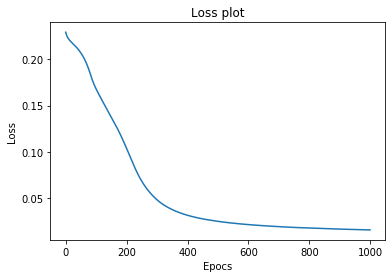

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(len(learning)), learning)
plt.title("Loss plot")
plt.xlabel("Epocs")
plt.ylabel("Loss")
plt.show()